In [1]:
import nltk
from nltk.book import *
from nltk.corpus import gutenberg
from nltk.corpus import brown
from nltk.corpus import webtext
from nltk.corpus import state_union
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.corpus import udhr
import random
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Question 1

In [2]:
phrase = ['hello','natural','language','processing']
phrase.append('python')
print(phrase + phrase)
print(phrase * 5)
print(phrase[0])
print(phrase[1:])
print(sorted(phrase))

['hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python']
['hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python', 'hello', 'natural', 'language', 'processing', 'python']
hello
['natural', 'language', 'processing', 'python']
['hello', 'language', 'natural', 'processing', 'python']


Question 2

In [3]:
# howmany word tokens and howmany word types
persuasion = gutenberg.words('austen-persuasion.txt')
print('word_tokens:',len([word for word in persuasion if word.isalpha()]))
print('word_types:',len(set([word.lower() for word in persuasion if word.isalpha()])))

word_tokens: 84121
word_types: 5739


Question 3

In [4]:
print(nltk.corpus.brown.categories()[5:7])
print(nltk.corpus.webtext.fileids()[3])
print(nltk.corpus.brown.words(categories = 'hobbies'))
print(nltk.corpus.brown.words(categories = 'humor'))
print(nltk.corpus.webtext.words(fileids = 'pirates.txt'))

['hobbies', 'humor']
pirates.txt
['Too', 'often', 'a', 'beginning', 'bodybuilder', ...]
['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]
['PIRATES', 'OF', 'THE', 'CARRIBEAN', ':', 'DEAD', ...]


Question 4

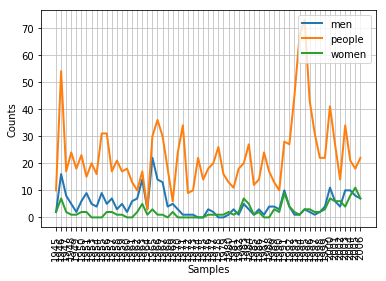

In [5]:
cfd = nltk.ConditionalFreqDist(((target,fileid[:4]) for fileid in state_union.fileids()
                     for words in state_union.words(fileid)
                     for target in ['men','women','people']
                     if words.lower().startswith(target)
 ))

cfd.plot()

Question 7

In [6]:
nltk.Text(persuasion).concordance('However')

Displaying 25 of 89 matches:
onceited , silly father . She had , however , one very intimate friend , a sens
early custom . But these measures , however good in themselves , were insuffici
ellynch Hall was to be let . This , however , was a profound secret , not to be
t immediate neighbourhood , which , however , had not suited him ; that acciden
e dues of a tenant . It succeeded , however ; and though Sir Walter must ever l
h , the former curate of Monkford , however suspicious appearances may be , but
good character and appearance ; and however Lady Russell might have asked yet f
siness no evil . She was assisted , however , by that perfect indifference and 
h the others . Something occurred , however , to give her a different duty . Ma
 , but can never alter plain ones . However , at any rate , as I have a great d
l what is due to you as my sister . However , we may as well go and sit with th
o means of her going . She wished , however to see the Crofts , and was glad to
ithout any 

Question 8

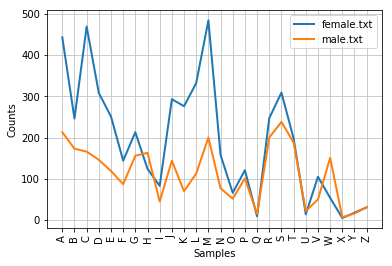

In [7]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist((fileid,name[0])
                               for fileid in names.fileids()
                               for name in names.words(fileid)
                              
                              
                              )
cfd.plot()

Question 9

In [8]:
news_text = nltk.corpus.brown.words(categories = 'news')
romance_text = nltk.corpus.brown.words(categories = 'romance')
print('Vocabulary of news',len(set(news_text)))
print('Vocabulary of romance',len(set(romance_text)))
print('Vocabulary richness of news',len(set(news_text))/len(news_text))
print('Vocabulary richness of romance',len(set(romance_text))/len(romance_text))
print('Similarity of address in both categories')
print(nltk.Text(news_text).similar('address'))
print(nltk.Text(romance_text).similar('address'))

Vocabulary of news 14394
Vocabulary of romance 8452
Vocabulary richness of news 0.14314696580941583
Vocabulary richness of romance 0.12070492131044529
Similarity of address in both categories
administration legislature date state welfare administrators wife
daughter back he texas speaker face first battle congress just down
bill lawyer
None
mass boredom sounds door smell bay dogs heat dead wife bill front back
first place thought head smoothness taste passion
None


Question 11

In [9]:
modals = ['can','could','may','might','must','will']

cfd = nltk.ConditionalFreqDist(((genre,words.lower())
 for genre in brown.categories()
 for words in brown.words(categories = genre)
))

In [10]:
genres = ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government','hobbies']
cfd.tabulate(conditions = ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government','hobbies'],samples = modals)

                 can could   may might  must  will 
     adventure    48   154     7    59    27    51 
belles_lettres   249   216   221   113   171   246 
     editorial   124    57    79    39    55   235 
       fiction    39   168    10    44    55    56 
    government   119    38   179    13   102   244 
       hobbies   276    59   143    22    84   269 


Question 12

In [11]:
prondict = nltk.corpus.cmudict.dict() #we use dict to count distinct keywords
print('Distinct Words in Prondict are',len(prondict))
wordPron = 0
for key in prondict:
    if len(prondict[key]) > 1:
        wordPron += 1
print('The Fraction is',wordPron/len(prondict))
        

Distinct Words in Prondict are 123455
The Fraction is 0.07485318537118789


Question 13

In [12]:
#what percent of noun_synsets have no hyponyms
# wn.all_synsets('n')
length = len(list(wn.all_synsets('n')))
cnt = 0
for synset in wn.all_synsets('n'):
    if(synset.hyponyms() == []):
        cnt += 1
print(cnt/length)

0.7967119283931072


Question 14

In [13]:
s = wn.synsets('screen')[0]

defis = ' '
defis = defis + s.name() + ' ' + s.definition() + '\n'
for synset in s.hypernyms():
    defis = defis + synset.name() + ' ' + synset.definition() + '\n'
for synset in s.hyponyms():
    defis = defis + synset.name() + ' ' + synset.definition() + '\n'
print(defis)

 screen.n.01 a white or silvered surface where pictures can be projected for viewing
surface.n.01 the outer boundary of an artifact or a material layer constituting or resembling such a boundary
wide_screen.n.01 a projection screen that is much wider than it is high



In [14]:
s = nltk.corpus.wordnet.synsets('computer')[0]
defis = ' '
defis = defis + s.name() + ' ' + s.definition() + '\n\n'
for synset in s.hypernyms():
    defis = defis + synset.name() + ' ' + synset.definition() + '\n\n'
for synset in s.hyponyms():
    defis = defis + synset.name() + ' ' + synset.definition() + '\n\n'
print(defis)

 computer.n.01 a machine for performing calculations automatically

machine.n.01 any mechanical or electrical device that transmits or modifies energy to perform or assist in the performance of human tasks

analog_computer.n.01 a computer that represents information by variable quantities (e.g., positions or voltages)

digital_computer.n.01 a computer that represents information by numerical (binary) digits

home_computer.n.01 a computer intended for use in the home

node.n.08 (computer science) any computer that is hooked up to a computer network

number_cruncher.n.02 a computer capable of performing a large number of mathematical operations per second

pari-mutuel_machine.n.01 computer that registers bets and divides the total amount bet among those who won

predictor.n.03 a computer for controlling antiaircraft fire that computes the position of an aircraft at the instant of a shell's arrival

server.n.03 (computer science) a computer that provides client stations with access to fil

In [15]:
def supergloss(s):
    defis = ' '
    defis = defis +  s.name() + 'definition:' + s.definition() + '\n\n'
    for synset in s.hypernyms():
        defis = defis + synset.name() + 'definition:' + synset.definition() + '\n\n'
    for synset in s.hyponyms():
        defis = defis + synset.name() + 'definition:' + synset.definition() + '\n\n'
    return defis

In [16]:
sets = nltk.corpus.wordnet.synsets('eating')
for s in sets:
    print(supergloss(s))

 eating.n.01definition:the act of consuming food

consumption.n.01definition:the process of taking food into the body through the mouth (as by eating)

bite.n.08definition:the act of gripping or chewing off with the teeth and jaws

browse.n.03definition:the act of feeding by continual nibbling

coprophagy.n.01definition:eating feces; in human a symptom of some kinds of insanity

dining.n.01definition:the act of eating dinner

engorgement.n.02definition:eating ravenously or voraciously to satiation

feasting.n.01definition:eating an elaborate meal (often accompanied by entertainment)

graze.n.02definition:the act of grazing

lunching.n.01definition:the act of eating lunch

mycophagy.n.01definition:the practice of eating fungi (especially mushrooms collected in the wild)

necrophagia.n.01definition:feeding on corpses or carrion

omophagia.n.01definition:the eating of raw food

repletion.n.02definition:eating until excessively full

scatophagy.n.01definition:the eating of excrement or oth

Question 15

In [17]:
brown_c = nltk.corpus.brown.words()
freq_dist = nltk.FreqDist(w.lower() for w in brown_c if w.isalpha())
wordSet = []
for key in freq_dist:
    if freq_dist[key] >= 3:
        wordSet.append(key)

Question 16

In [18]:
categories = nltk.corpus.brown.categories()
score_arr = []
cat_arr = []
for category in categories:
    token = len(nltk.corpus.brown.words(categories = category))
    types = len(set(brown.words(categories = category)))
    score = types/token
    cat_arr.append(category)
    score_arr.append(score)   

In [19]:
import pandas as pd
df = pd.DataFrame({'category':cat_arr,'score':score_arr})

In [20]:
df[df['score'] == df['score'].min()]

,category,score
7,learned,0.092689


Question 17

In [21]:
# 50 most frequently occuring words in a text that are not stopwords
text = nltk.corpus.nps_chat.words()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
fdist = nltk.FreqDist(words.lower() for words in text if words not in stopwords)
fdist.most_common(50)

[('.', 1268),
 ('part', 1022),
 ('join', 1021),
 ('lol', 822),
 ('?', 737),
 ('hi', 656),
 (',', 596),
 ('i', 576),
 ('...', 412),
 ('..', 361),
 ('action', 347),
 ('!', 342),
 ('hey', 292),
 ('u', 204),
 ("'s", 195),
 ('....', 170),
 ('like', 160),
 ('im', 149),
 ('pm', 149),
 ('chat', 146),
 ("n't", 144),
 ('/', 133),
 ("'m", 133),
 ('good', 132),
 ('lmao', 128),
 ('u7', 119),
 ('u34', 119),
 ('wanna', 110),
 ('ok', 106),
 ('know', 104),
 ('get', 104),
 ('room', 103),
 (':)', 101),
 ('u35', 101),
 ('ya', 100),
 (':', 96),
 ('wb', 96),
 ('oh', 96),
 ('-', 93),
 ('hello', 92),
 ('u18', 92),
 ('well', 91),
 ('one', 91),
 ('yes', 87),
 ('"', 87),
 ('yeah', 85),
 ('hiya', 85),
 ('u30', 81),
 ('back', 79),
 ('u19', 79)]

In [22]:
def find_50_most_common(text):
    fdist = nltk.FreqDist(words.lower() for words in text if words not in nltk.corpus.stopwords.words('english'))
    return fdist.most_common(50)

In [23]:
print(find_50_most_common(nltk.corpus.nps_chat.words()))

[('.', 1268), ('part', 1022), ('join', 1021), ('lol', 822), ('?', 737), ('hi', 656), (',', 596), ('i', 576), ('...', 412), ('..', 361), ('action', 347), ('!', 342), ('hey', 292), ('u', 204), ("'s", 195), ('....', 170), ('like', 160), ('im', 149), ('pm', 149), ('chat', 146), ("n't", 144), ('/', 133), ("'m", 133), ('good', 132), ('lmao', 128), ('u7', 119), ('u34', 119), ('wanna', 110), ('ok', 106), ('know', 104), ('get', 104), ('room', 103), (':)', 101), ('u35', 101), ('ya', 100), (':', 96), ('wb', 96), ('oh', 96), ('-', 93), ('hello', 92), ('u18', 92), ('well', 91), ('one', 91), ('yes', 87), ('"', 87), ('yeah', 85), ('hiya', 85), ('u30', 81), ('back', 79), ('u19', 79)]


Question 18

In [24]:
text = nltk.corpus.gutenberg.words('chesterton-ball.txt')
stopwords = nltk.corpus.stopwords.words('english')
bigram = list(nltk.bigrams(text))
bigram = list(nltk.bigrams(text))
fd = nltk.FreqDist(b for b in bigram if b[0].isalpha() and b[0] not in stopwords and b[1] not in stopwords)

In [25]:
def find_50_most_common_bigrams(text):
    stopwords = nltk.corpus.stopwords.words('english')
    bigram = list(nltk.bigrams(text))
    feq_dist = nltk.FreqDist(b for b in bigram if b[0].isalpha() and b[0] not in stopwords and b[1] not in stopwords)
    return feq_dist.most_common(50)
    

In [26]:
print(find_50_most_common_bigrams(nltk.corpus.gutenberg.words('chesterton-ball.txt')))

[(('Turnbull', ','), 183), (('MacIan', ','), 134), (('said', 'Turnbull'), 120), (('said', ','), 100), (('Mr', '.'), 87), (('said', 'MacIan'), 83), (('I', "'"), 60), (('man', ','), 53), (('I', 'know'), 52), (('Turnbull', '.'), 51), (('MacIan', '.'), 42), (('Evan', ','), 41), (('Oh', ','), 39), (('Turnbull', "'"), 37), (('Well', ','), 36), (('I', 'think'), 33), (('said', ':'), 32), (('I', 'say'), 29), (('however', ','), 29), (('Yes', ','), 28), (('said', 'Evan'), 28), (('St', '.'), 25), (('world', '.'), 25), (('half', '-'), 25), (('I', 'mean'), 24), (('Why', ','), 23), (('say', ','), 21), (('asked', 'Turnbull'), 21), (('said', '.'), 21), (('No', ','), 20), (('Yes', ',"'), 20), (('Project', 'Gutenberg'), 20), (('man', '.'), 19), (('I', 'want'), 19), (('like', 'one'), 19), (('Dr', '.'), 19), (('garden', ','), 18), (('man', "'"), 18), (('Evan', 'MacIan'), 18), (('us', '.'), 18), (('voice', ','), 18), (('I', 'suppose'), 18), (('young', 'man'), 17), (('I', 'must'), 17), (('first', 'time'), 17

Question 19

In [27]:
cfd = nltk.ConditionalFreqDist(
    (genre,words)
    for genre in brown.categories()
    for words in brown.words(categories = genre)
)
samples = ['love','like','peace','hate','war','fight','battle']
genres = brown.categories()
cfd.tabulate(comditions = genres,samples = samples)

                  love   like  peace   hate    war  fight battle 
      adventure      9    136      5      8     18     10      3 
 belles_lettres     68    169     29      4     84     13     22 
      editorial     13     49     30      0     54     10      3 
        fiction     16    147      3      9     24      7      6 
     government      1     21     11      0      7      0      0 
        hobbies      6     66      3      0     12      1      2 
          humor      4     34      1      0      1      0      2 
        learned     13     83      8      2     16      7      4 
           lore     19     86     11      2     23     15     13 
        mystery      7    136      0      2      2      4      1 
           news      3     46      4      1     20     14     15 
       religion     13     18     19      3     14      3      1 
        reviews      7     36      2      2     17      5      3 
        romance     32    185      7      9     11      7      3 
science_fi

Question 21

In [28]:
text = nltk.corpus.gutenberg.words('chesterton-ball.txt')
prondict = nltk.corpus.cmudict.dict()
number = 0
for word in text:
    if word.lower() in prondict.keys():
        number += len(prondict[word.lower()][0])
print(number)

284418


In [29]:
text = nltk.corpus.gutenberg.words()
prondict = nltk.corpus.cmudict.dict()
number = 0
for word in text:
    if word in prondict.keys():
        number += len(prondict[word][0])
print(number)

6164218


In [30]:
def number_of_syllables(text):
    prondict = nltk.corpus.cmudict.dict()
    number = 0
    for words in text:
        if words in prondict.keys():
            number += len(prondict[words][0])
    return number

In [31]:
print(number_of_syllables(nltk.corpus.gutenberg.words()))

6164218


Question 22

In [32]:
text = nltk.corpus.gutenberg.words('chesterton-ball.txt')
new_version = list(text)
for i in range(3,len(text)+len(text)//3,3):
    new_version.insert(i,'like')
nltk.Text(new_version)

<Text: The Ball like and The like Cross by like G . like K . like Chesterton 1909 like>

In [33]:
def hedge(text):
    new_version  = list(text)
    for i in range(2,len(text)+len(text)//3,3):
        new_version.insert(i,'like')
    return nltk.Text(new_version)

Question 23

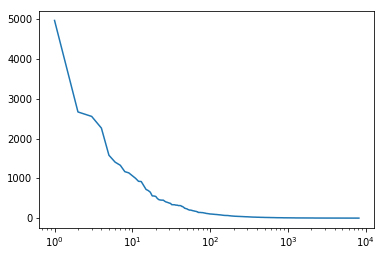

In [34]:
text = nltk.corpus.gutenberg.words('chesterton-ball.txt')
fdist = nltk.FreqDist((words.lower() for words in text if words.isalpha()))
fdist = fdist.most_common()
rank = []
freq = []
n = 1
for i in range(len(fdist)):
    freq.append(fdist[i][1])
    
    rank.append(n)
    n += 1
    
plt.plot(rank,freq)
plt.xscale('log')


In [35]:
# zips law suggests that in a corpora when the words are arranged in decreasing order of their frequencies the product of their rank and freq
#uency remains a constant or rank and frequency have a inverse relation

def zip_law(text):
    fdist = nltk.FreqDist((word.lower() for word in text if word.isalpha()))
    fdist = fdist.most_common()
    freq = []
    rank = []
    n = 1
    for i in range(len(fdist)):
        freq.append(fdist[i][1])

        rank.append(n)
        n += 1

    plt.plot(rank,freq)
    plt.xscale('log')
    

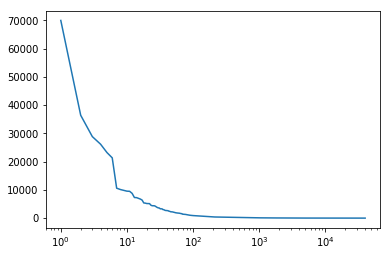

In [36]:
zip_law(nltk.corpus.brown.words())

In [37]:
import random
randomText = ' '
for i in range(100000):
    randomText = randomText + random.choice('abcdefg ')

In [38]:
randomText.split()

['fcagg',
 'bbdeefbbeca',
 'ggeggc',
 'edccd',
 'aeadacaedefbdceadg',
 'dfbbbb',
 'eebba',
 'd',
 'egg',
 'afbcdagegef',
 'd',
 'bcba',
 'c',
 'egddefe',
 'cgfbafb',
 'fgageb',
 'aabgdfddefdcafagdggbdcbc',
 'gebadgggfdfcfeecbaceafebdfebefcb',
 'eaeebadcfadfgbgdgccgcfafag',
 'eea',
 'ccgdafcbgfdcde',
 'c',
 'eec',
 'cgeafgeec',
 'befggcabfecccdfggfacdbdfdbg',
 'bfef',
 'eeg',
 'gg',
 'dbbfbcbaba',
 'e',
 'fagfggbebaabgg',
 'g',
 'bgcedabcc',
 'dbfdadaceaabfcbeddabadcccdb',
 'cbffe',
 'gfcbggcgdefaa',
 'ged',
 'ddd',
 'dgefefeebadfddgdggdfee',
 'cadefcacdddbbe',
 'aefcg',
 'gca',
 'cbgbbegeccaf',
 'ec',
 'dbfggd',
 'cegaafecfd',
 'aacgcfcgcgc',
 'afddgegabegegfdbbfdd',
 'acg',
 'bbeggdfbfdafafcd',
 'ga',
 'a',
 'fbeba',
 'ecacb',
 'ebd',
 'ggaf',
 'fccefcg',
 'gd',
 'fbebegfe',
 'ggeacbdbaecdecdb',
 'cfacf',
 'cbfebga',
 'cebe',
 'a',
 'gf',
 'eaaddacdggbga',
 'cgggbegcgd',
 'cgbfdee',
 'gcfgcfdceg',
 'dbdccdddcefdb',
 'agfc',
 'bbaaceeee',
 'ecfb',
 'bfgfbe',
 'cfcgbgeabcfgbce',
 'ebbcc

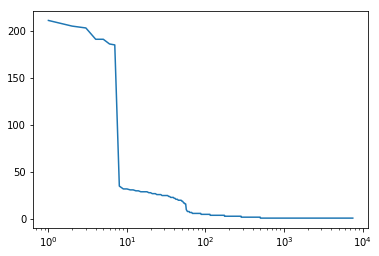

In [39]:
zip_law(randomText.split())

Question 24